In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from zipfile import ZipFile

In [0]:
filename= "/content/drive/My Drive/video.zip"
ZipFile(filename,'r').extractall()

In [0]:
import os

def load_images_from_folder(folder):
    images = []
    titles=[]
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename))
        if img is not None:
          images.append(img)
          titles.append(filename)
    return images,titles

Text(0.5, 1.0, 'Checking if image loading is successful')

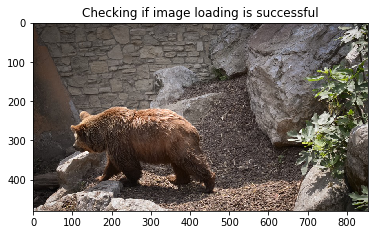

In [10]:
frames, titles= load_images_from_folder("/content/drive/My Drive/video/")
frames = [frames for _,frames in sorted(zip(titles,frames))]
titles.sort()
plt.imshow(frames[0])
plt.title("Checking if image loading is successful")

##Spatial Segmentation of a single image (for demonstration)



Text(0.5, 1.0, 'Gray scaled image')

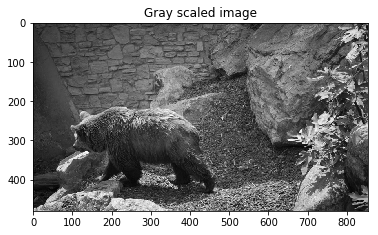

In [57]:
pic=rgb2gray(frames[0])

plt.imshow(pic, cmap='gray')
plt.title("Gray scaled image")

Text(0.5, 1.0, 'Image after clustering')

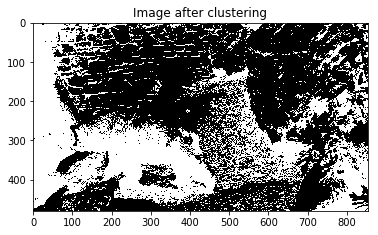

In [60]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], 1)

kmeans = KMeans(n_clusters=6, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1])
plt.imshow(cluster_pic)

threshold= (kmeans.cluster_centers_[0]+kmeans.cluster_centers_[1])/2.0
ret, thresh = cv2.threshold(pic2show, threshold, int(255), cv2.THRESH_BINARY_INV) 
cluster_pic = thresh.reshape(pic.shape[0], pic.shape[1])


plt.imshow(cluster_pic, cmap='gray')
plt.title("Image after clustering")

##Spatial Segmentation of all images in the folder

In [0]:
from sklearn.cluster import KMeans

array_of_BW_images=[]

for pic in frames:
  pic=rgb2gray(pic)
  pic_n = pic.reshape(pic.shape[0]*pic.shape[1],1)
  kmeans = KMeans(n_clusters=2, random_state=0).fit(pic_n)
  labels= kmeans.labels_
  pic2show = kmeans.cluster_centers_[labels]
  threshold= (kmeans.cluster_centers_[0]+kmeans.cluster_centers_[1])/2.0
  ret, thresh = cv2.threshold(pic2show, threshold, 255, cv2.THRESH_BINARY_INV)
  cluster_pic = thresh.reshape(pic.shape[0], pic.shape[1])
  array_of_BW_images.append(cluster_pic)

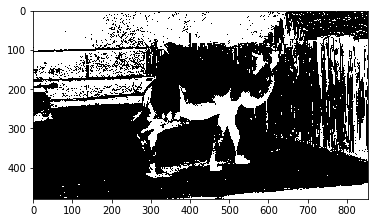

In [97]:
plt.imshow(array_of_BW_images[25], cmap='gray')

##Extracting Feature from a single image (for demonstration)

In [0]:
from skimage.feature import hog
from skimage import exposure

def extract_features(image, vector_size=32):
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), 
  cells_per_block=(8, 8), visualize=True, multichannel=True)
  
  return hog_image, fd

In [73]:
hog_image, fd = extract_features(frames[0])
print("Feature Vector: ", fd)

Feature Vector:  [0.03236446 0.01126103 0.02035347 ... 0.00595567 0.0044555  0.00366655]


In [0]:
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

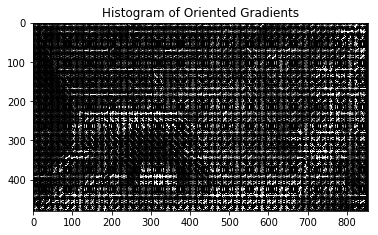

In [75]:
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
plt.title("Histogram of Oriented Gradients")

##Extracting features from all the images

In [0]:
features=[]
for i in frames:
  hog_image, fd= extract_features(i)
  features.append(fd)
features= np.array(features)

In [77]:
print(features)

[[0.03236446 0.01126103 0.02035347 ... 0.00595567 0.0044555  0.00366655]
 [0.03452146 0.01275465 0.00909902 ... 0.00819541 0.00626603 0.00121805]
 [0.03420644 0.01532671 0.00509077 ... 0.00428259 0.00615397 0.00413655]
 ...
 [0.03819821 0.0106613  0.01552421 ... 0.01876956 0.02425363 0.01975741]
 [0.02783105 0.01862808 0.01841647 ... 0.01623041 0.03402947 0.02446777]
 [0.02290403 0.02151192 0.01482649 ... 0.03261555 0.08603913 0.05471464]]


##Clustering the images using the above generated features

In [0]:
kmeans = KMeans(n_clusters=7).fit(features)
labels= kmeans.labels_

In [95]:
for i in range(0, len(labels)):
  print(titles[i],"has a label::", labels[i])

00000.jpg has a label:: 4
00001.jpg has a label:: 4
00002.jpg has a label:: 4
00003.jpg has a label:: 4
00004.jpg has a label:: 4
00005.jpg has a label:: 4
00006.jpg has a label:: 5
00007.jpg has a label:: 5
00008.jpg has a label:: 5
00009.jpg has a label:: 5
00010.jpg has a label:: 5
00011.jpg has a label:: 5
00012.jpg has a label:: 5
00013.jpg has a label:: 5
00014.jpg has a label:: 5
00015.jpg has a label:: 3
00016.jpg has a label:: 3
00017.jpg has a label:: 3
00018.jpg has a label:: 3
00019.jpg has a label:: 3
00020.jpg has a label:: 3
00021.jpg has a label:: 3
00022.jpg has a label:: 3
00023.jpg has a label:: 3
00024.jpg has a label:: 3
00025.jpg has a label:: 3
00027.jpg has a label:: 1
00028.jpg has a label:: 1
00029.jpg has a label:: 1
00030.jpg has a label:: 1
00031.jpg has a label:: 1
00032.jpg has a label:: 1
00033.jpg has a label:: 1
00034.jpg has a label:: 1
00035.jpg has a label:: 1
00036.jpg has a label:: 1
00037.jpg has a label:: 1
00038.jpg has a label:: 6
00039.jpg ha